PoC - Proof of Concept

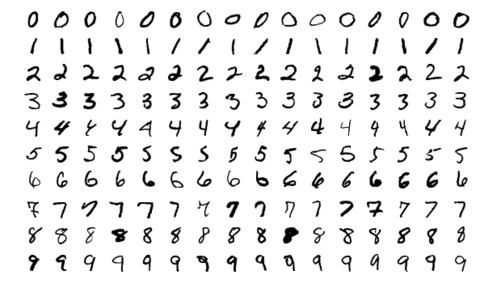

#MNIST Dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 39s 3us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full[0].shape

(28, 28)

In [6]:
y_train_full.shape

(60000,)

In [7]:
y_train_full[0]

5

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

In [10]:
img = X_train_full[0]
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

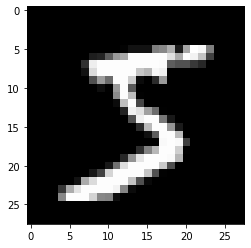

In [11]:
plt.imshow(img, cmap="gray")

In [12]:
label = y_train_full[0]
label

5

<AxesSubplot:>

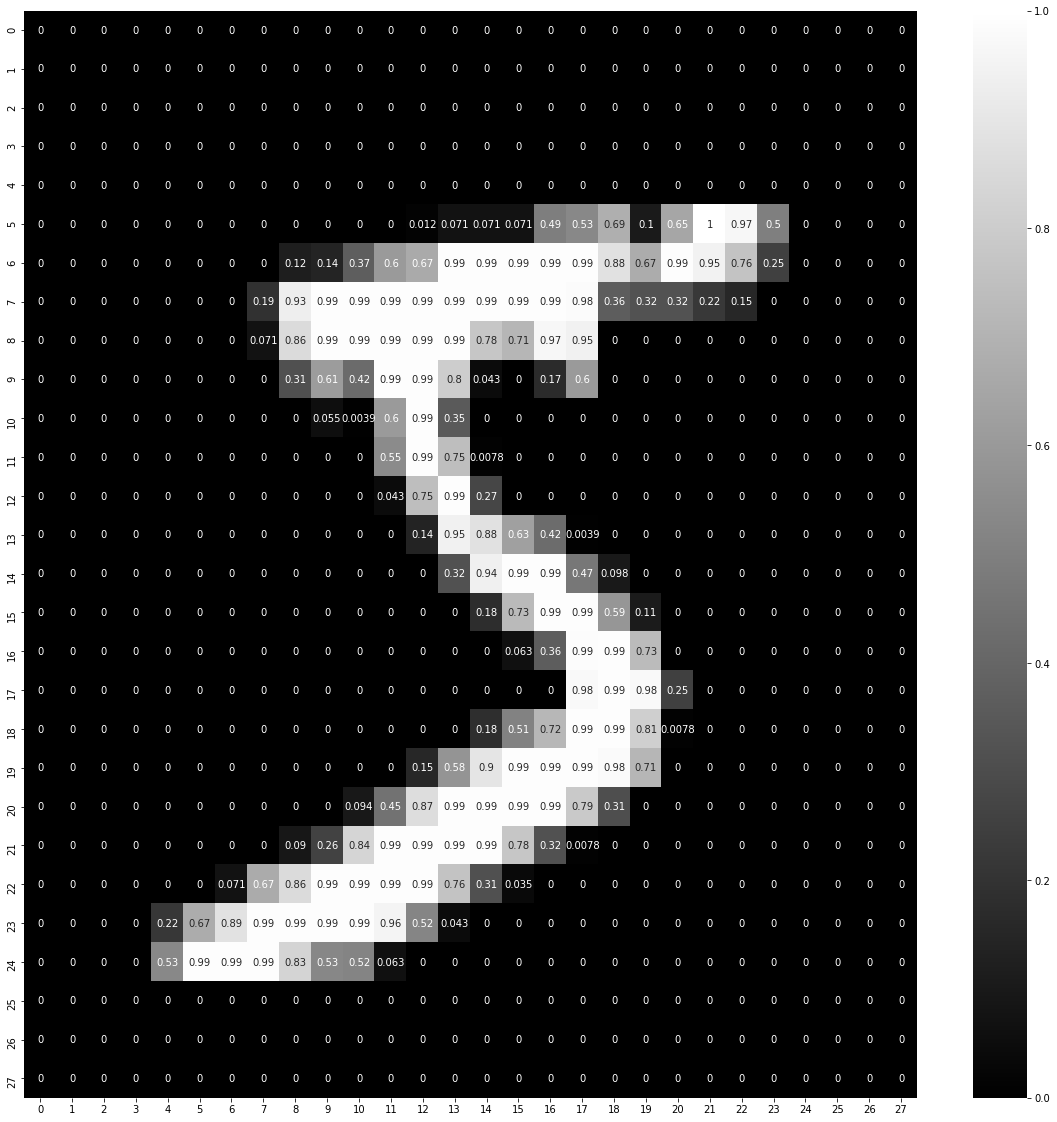

In [13]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255, annot=True, cmap="gray")

In [14]:
print(1e+1, 1e+2, 1e+4, 1.5e+1, 1.5e+2)

10.0 100.0 10000.0 15.0 150.0


In [15]:
1.5e+2

150.0

In [16]:
1.5 * 10 ** 2

150.0

1. *0 -> 255* => More computation time, and Search space is large for finding solution.

2. *0 -> 1* => Less computation time, and Search space is small for finding solution.


In [17]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test/255 

In [18]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [19]:
len(np.unique(y_train))

10

In [20]:
CLASSES = len(np.unique(y_train))
CLASSES

10

In [21]:
LAYERS = [
    tf.keras.layers.Flatten(input_shape=(28, 28), name="inputLayer"), # 784
    tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer01"), # 300
    tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer02"), # 100
    tf.keras.layers.Dense(CLASSES, activation="softmax", name="outputLayer"), # 10
]

In [22]:
model_clf = tf.keras.models.Sequential(LAYERS)

In [23]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer01 (Dense)        (None, 300)               235500    
_________________________________________________________________
hiddenLayer02 (Dense)        (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
# weights + biases
784*300 + 300

235500

In [25]:
300*100 + 100

30100

In [26]:
100 * 10 + 10

1010

In [27]:
235500 + 30100 + 1010

266610

In [28]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZERS = "SGD"
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION, optimizer=OPTIMIZERS, metrics=METRICS)

In [29]:
EPOCHS = 30

VALIDATION = (X_valid, y_valid)

history = model_clf.fit(
    X_train,
    y_train,
    epochs = EPOCHS,
    batch_size=32,
    validation_data = VALIDATION
)

Epoch 1/30
1719/1719 [==============================] - 9s 4ms/step - loss: 0.5831 - accuracy: 0.8491 - val_loss: 0.3048 - val_accuracy: 0.9156
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2857 - accuracy: 0.9179 - val_loss: 0.2389 - val_accuracy: 0.9314
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2323 - accuracy: 0.9334 - val_loss: 0.2024 - val_accuracy: 0.9438
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1975 - accuracy: 0.9436 - val_loss: 0.1808 - val_accuracy: 0.9502
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1718 - accuracy: 0.9509 - val_loss: 0.1593 - val_accuracy: 0.9554
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1516 - accuracy: 0.9563 - val_loss: 0.1418 - val_accuracy: 0.9614
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1350 - accuracy: 0.9609 - val_loss: 0.1348 - val_accuracy:

In [30]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.583083,0.849109,0.304764,0.9156
1,0.285711,0.917873,0.238911,0.9314
2,0.232254,0.933418,0.202397,0.9438
3,0.197507,0.943618,0.180836,0.9502
4,0.171806,0.950909,0.159342,0.9554
5,0.151577,0.956291,0.141836,0.9614
6,0.135048,0.960891,0.134818,0.9628
7,0.122014,0.964655,0.123112,0.9668
8,0.110777,0.967982,0.117061,0.9674
9,0.101037,0.971618,0.110059,0.9694


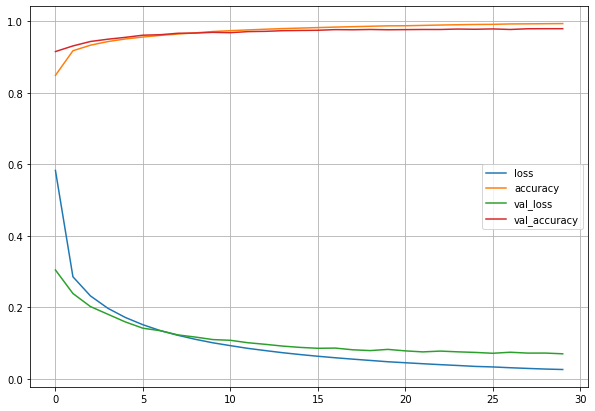

In [31]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [32]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0666 - accuracy: 0.9788


[0.06662305444478989, 0.9787999987602234]

In [33]:
10000/32

312.5

In [34]:
model_clf.save("mnist_full.h5")

In [35]:
X_new = X_test[:3]

y_prob = model_clf.predict(X_new)
y_prob.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.001, 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [36]:
X_new.shape

(3, 28, 28)

In [37]:
y_prob.shape

(3, 10)

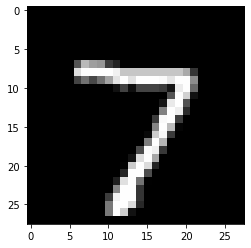

In [38]:
plt.imshow(X_new[0], cmap="gray")

In [39]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([7, 2, 1], dtype=int64)

In [40]:
for kohli, dhoni, dravid in zip([1,2,3], [3,2,1], [3,3,3]):
    print(kohli, dhoni, dravid)

1 3 3
2 2 3
3 1 3


In [41]:
list(zip([1,2,3], [3,2,1], [3,3,3]))

[(1, 3, 3), (2, 2, 3), (3, 1, 3)]

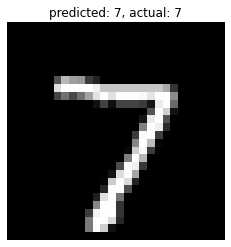

------------------------------------------------------------


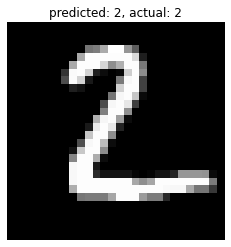

------------------------------------------------------------


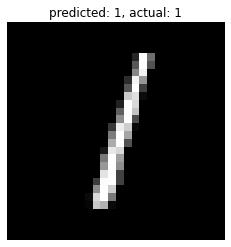

------------------------------------------------------------


In [42]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test[:3]):
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

In [43]:
y_train.shape

(55000,)

In [44]:
y_train[1]

3


y_train - 

data_points | label
-|-
0|7
1|3

X_train 

data_points | data
-|-
0|(28, 28)
1|(28, 28)
2|(28, 28)
3|(28, 28)


data 

data_points | data | label
-|-| -
0|(28, 28) | 7
1|(28, 28) | 3
2|(28, 28)
3|(28, 28)


# Transfer learning

## New problem statement - 
Classify handwritten digits into odd and even

In [45]:
pretrained_model = tf.keras.models.load_model("mnist_full.h5")

In [46]:
pretrained_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer01 (Dense)        (None, 300)               235500    
_________________________________________________________________
hiddenLayer02 (Dense)        (None, 100)               30100     
_________________________________________________________________
outputLayer (Dense)          (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [47]:
for layer in pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

inputLayer: True
hiddenLayer01: True
hiddenLayer02: True
outputLayer: True


In [48]:
for layer in pretrained_model.layers[:-1]: # leave the last layer
    layer.trainable = False

In [49]:
for layer in pretrained_model.layers:
    print(f"{layer.name}: {layer.trainable}")

inputLayer: False
hiddenLayer01: False
hiddenLayer02: False
outputLayer: True


In [50]:
lower_pretrained_model = pretrained_model.layers[:-1]

In [51]:
new_model = tf.keras.models.Sequential(lower_pretrained_model)
new_model.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

In [52]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputLayer (Flatten)         (None, 784)               0         
_________________________________________________________________
hiddenLayer01 (Dense)        (None, 300)               235500    
_________________________________________________________________
hiddenLayer02 (Dense)        (None, 100)               30100     
_________________________________________________________________
dense (Dense)                (None, 2)                 202       
Total params: 265,802
Trainable params: 202
Non-trainable params: 265,600
_________________________________________________________________


In [53]:
100*2 + 2

202

In [54]:
def update_even_odd_labels(labels):
    for idx, label in enumerate(labels):
        labels[idx] = np.where(label%2 == 0, 1, 0) # 1 -> even, 0 -> odd
    return labels

In [55]:
ex_1 = np.array([1,2,3,4,5])
ex_1

array([1, 2, 3, 4, 5])

In [56]:
for idx, label in enumerate(ex_1):
    # print(idx, label)
    print(ex_1[idx], np.where(label%2 == 0, 1, 0))

1 0
2 1
3 0
4 1
5 0


In [57]:
y_train_bin, y_test_bin, y_valid_bin = update_even_odd_labels([y_train, y_test, y_valid])

In [58]:
np.unique(y_train_bin)

array([0, 1])

In [59]:
new_model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="SGD",
                  metrics=["accuracy"]
                  )

In [60]:
history = new_model.fit(
    X_train, y_train_bin, epochs=10, validation_data = (X_valid, y_valid_bin)
)

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1734 - accuracy: 0.9370 - val_loss: 0.1182 - val_accuracy: 0.9620
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1116 - accuracy: 0.9624 - val_loss: 0.1033 - val_accuracy: 0.9674
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0995 - accuracy: 0.9665 - val_loss: 0.0953 - val_accuracy: 0.9692
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0930 - accuracy: 0.9686 - val_loss: 0.0922 - val_accuracy: 0.9698
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0890 - accuracy: 0.9696 - val_loss: 0.0890 - val_accuracy: 0.9698
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0861 - accuracy: 0.9706 - val_loss: 0.0871 - val_accuracy: 0.9714
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0835 - accuracy: 0.9712 - val_loss: 0.0850 - val_accuracy:

In [61]:
new_model.evaluate(X_test, y_test_bin)

313/313 [==============================] - 1s 3ms/step - loss: 0.0874 - accuracy: 0.9710


[0.08743641525506973, 0.9710000157356262]

In [62]:
X_new = X_test[:3]

y_prob = new_model.predict(X_new)
y_prob.round(3)

array([[0.996, 0.004],
       [0.   , 1.   ],
       [0.958, 0.042]], dtype=float32)

In [63]:
Y_pred = np.argmax(y_prob, axis=-1)
Y_pred

array([0, 1, 0], dtype=int64)

In [64]:
y_test_bin[:3]

array([0, 1, 0])

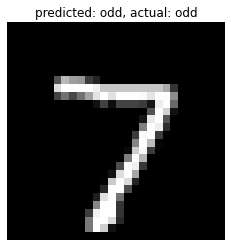

------------------------------------------------------------


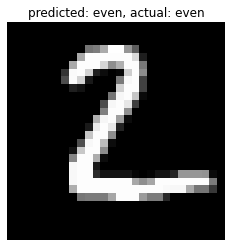

------------------------------------------------------------


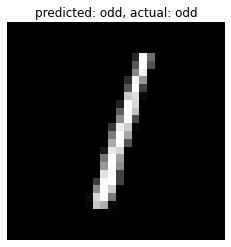

------------------------------------------------------------


In [65]:
for img_array, pred, actual in zip(X_new, Y_pred, y_test_bin[:3]):
    if pred == 1:
        pred = "even"
    else:
        pred = "odd"

    if actual == 1:
        actual = "even"
    else:
        actual = "odd"
    plt.imshow(img_array, cmap="gray")
    plt.title(f"predicted: {pred}, actual: {actual}")
    plt.axis("off")
    plt.show()
    print("--"*30)

# Train A CNN model on MNIST data

In [66]:
X_train[0].shape

(28, 28)

In [67]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [68]:
np.expand_dims(X_train, -1).shape

(55000, 28, 28, 1)

In [69]:
np.expand_dims(X_train, -2).shape

(55000, 28, 1, 28)

In [70]:
np.expand_dims(X_train, -3).shape

(55000, 1, 28, 28)

In [71]:
np.expand_dims(X_train, 1).shape

(55000, 1, 28, 28)

In [72]:
np.expand_dims(X_train, 3).shape

(55000, 28, 28, 1)

In [73]:
X_train_CNN = np.expand_dims(X_train, -1)
X_test_CNN = np.expand_dims(X_test, -1)
X_valid_CNN = np.expand_dims(X_valid, -1)

In [74]:
X_train_CNN.shape

(55000, 28, 28, 1)

In [75]:
X_train_CNN[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [76]:
X_train_CNN[0].shape

(28, 28, 1)

In [77]:
input_shape = (28, 28, 1) # (row, col, channels)
CLASSES = 10
LAYERS = [
    tf.keras.Input(shape=input_shape),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(CLASSES, activation="softmax")
]

In [78]:
CNN_model = tf.keras.Sequential(
    LAYERS
)

In [79]:
CNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                16010     
Total params: 34,826
Trainable params: 34,826
Non-trainable params: 0
__________________________________________________

In [80]:
64*5*5

1600

In [81]:
(3*3*1 + 1) * 32

320

In [82]:
(28 - 3) // 1 + 1

26

In [83]:
(26 - 2) // 2 + 1

13

In [84]:
(3*3*32 + 1) * 64

18496

In [85]:
1600 * 10 + 10

16010

# Assignment = 

1. Train this model (10 classes)
2. Try Transfer learning by changing the last layer to classify no. as even and odd (2 classes)

Mail your assignment at - 
sunny@ineuron.ai

Subject Line of this email -

**[FSDS-Nov] CNN transfer learning Assignment**

In [86]:
CNN_model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='SGD', 
              metrics=['accuracy'])

In [87]:
history = CNN_model.fit(
    X_train_CNN, y_train, epochs=30, 
    validation_data = (X_valid_CNN, y_valid)
)

Epoch 1/30
1719/1719 [==============================] - 66s 38ms/step - loss: 0.5830 - accuracy: 0.8336 - val_loss: 0.2310 - val_accuracy: 0.9302
Epoch 2/30
1719/1719 [==============================] - 66s 38ms/step - loss: 0.1837 - accuracy: 0.9451 - val_loss: 0.1379 - val_accuracy: 0.9630
Epoch 3/30
1719/1719 [==============================] - 69s 40ms/step - loss: 0.1279 - accuracy: 0.9623 - val_loss: 0.1082 - val_accuracy: 0.9694
Epoch 4/30
1719/1719 [==============================] - 94s 55ms/step - loss: 0.1040 - accuracy: 0.9681 - val_loss: 0.0940 - val_accuracy: 0.9716
Epoch 5/30
1719/1719 [==============================] - 94s 55ms/step - loss: 0.0895 - accuracy: 0.9730 - val_loss: 0.0868 - val_accuracy: 0.9738
Epoch 6/30
1719/1719 [==============================] - 84s 49ms/step - loss: 0.0795 - accuracy: 0.9757 - val_loss: 0.0845 - val_accuracy: 0.9736
Epoch 7/30
1719/1719 [==============================] - 79s 46ms/step - loss: 0.0728 - accuracy: 0.9780 - val_loss: 0.0708 -

In [88]:
CNN_model.evaluate(X_test_CNN, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0384 - accuracy: 0.9878


[0.03841162845492363, 0.9878000020980835]

In [89]:
CNN_model.save("CNN_model_full.h5")

In [90]:
pre_trained_CNN_model = tf.keras.models.load_model("CNN_model_full.h5")

In [91]:
for layer in pre_trained_CNN_model.layers[:-1]: # leave the last layer
    layer.trainable = False

In [92]:
lower_pretrained_CNN_model = pre_trained_CNN_model.layers[:-1]

In [93]:
new_CNN_model = tf.keras.models.Sequential(lower_pretrained_CNN_model)
new_CNN_model.add(
    tf.keras.layers.Dense(2, activation="softmax")
)

In [94]:
new_CNN_model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [ ]:
new_CNN_model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='SGD', 
              metrics=['accuracy'])

In [ ]:
history = new_CNN_model.fit(
    X_train_CNN, y_train_bin, epochs=30, 
    validation_data = (X_valid_CNN, y_valid_bin)
)

In [ ]:
new_CNN_model.evaluate(X_test_CNN, y_test_bin)